In [1]:
from pyndamics import *
from pyndamics.emcee import *

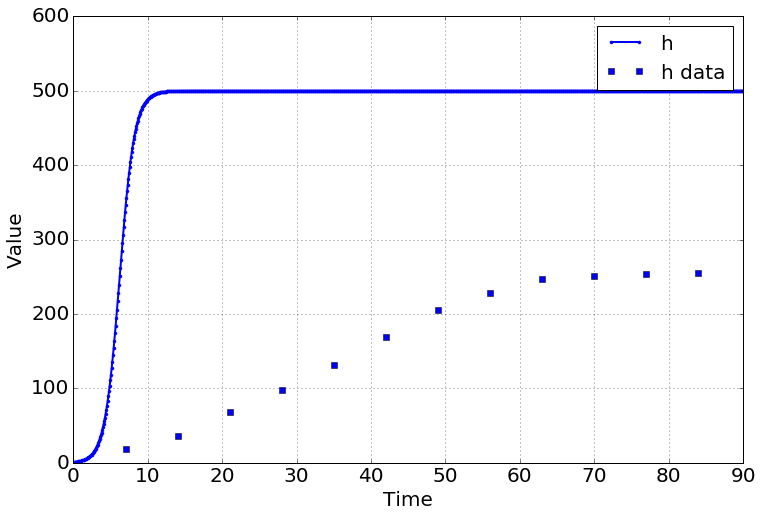

In [2]:
t=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

sim=Simulation()
sim.add("h'=a*h*(1-h/K)",1,plot=True)
sim.add_data(t=t,h=h,plot=True)
sim.params(a=1,K=500)
sim.run(0,90)

In [3]:
model=MCMCModel(sim,
                a=Uniform(.001,5),
                K=Uniform(100,500),
                initial_h=Uniform(0,100),
                )

Sampling Prior...
Done.
0.30 s
Running MCMC...
Done.
21.64 s


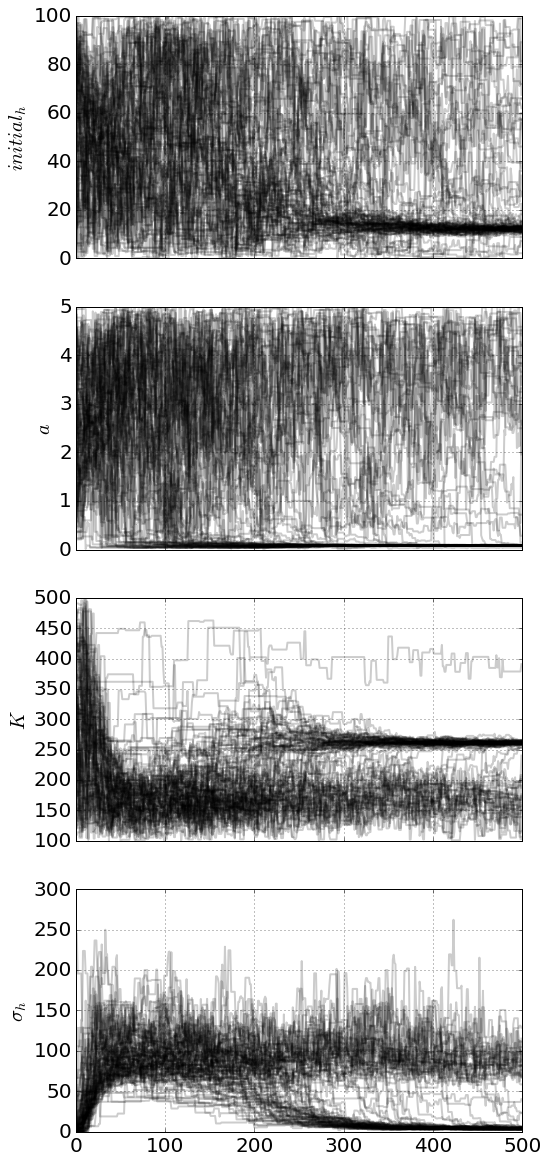

In [4]:
model.run_mcmc(500)
model.plot_chains()

Running MCMC...
Done.
24.63 s


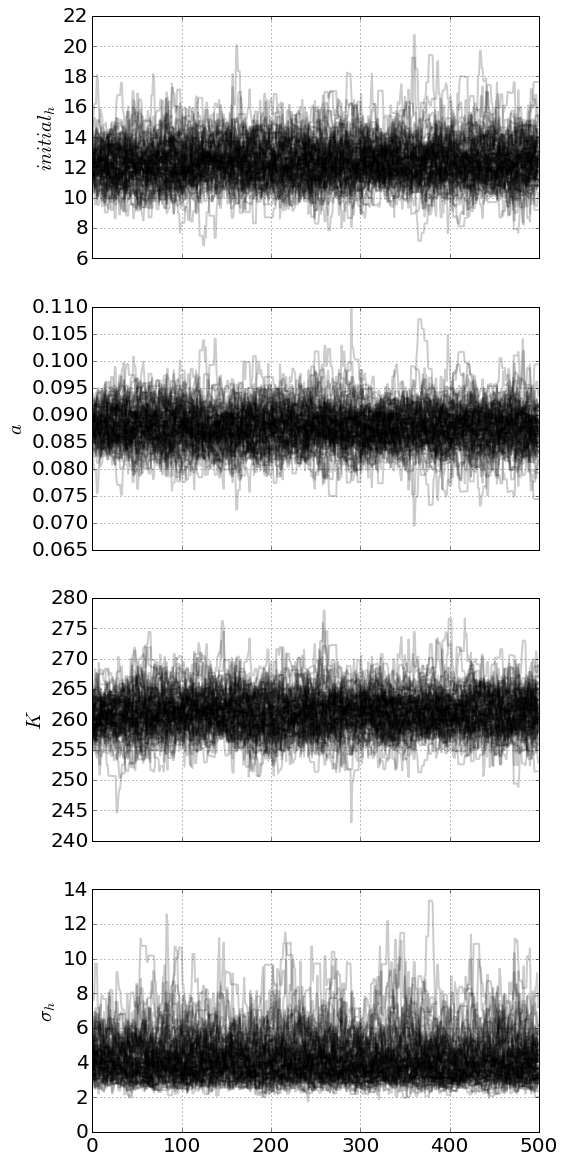

In [7]:
model.set_initial_values('samples')  # reset using the 16-84 percentile values from the samples
model.run_mcmc(500)
model.plot_chains()

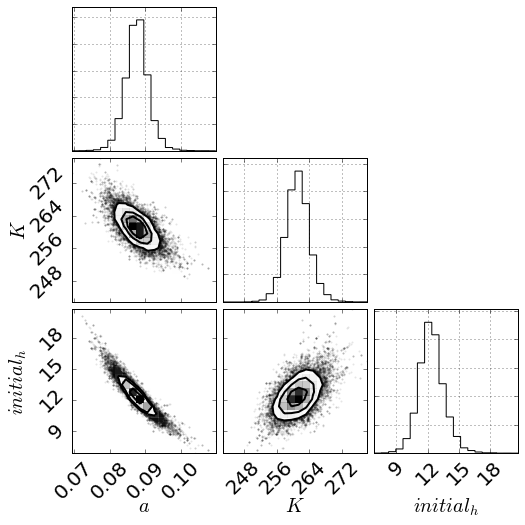

In [39]:
model.triangle_plot('a','K','initial_h')

In [40]:
args=('a','K','initial_h')
idx=[model.index[key] for key in args]
samples=model.samples[:,idx]

In [10]:
samples.shape

(37500, 2)

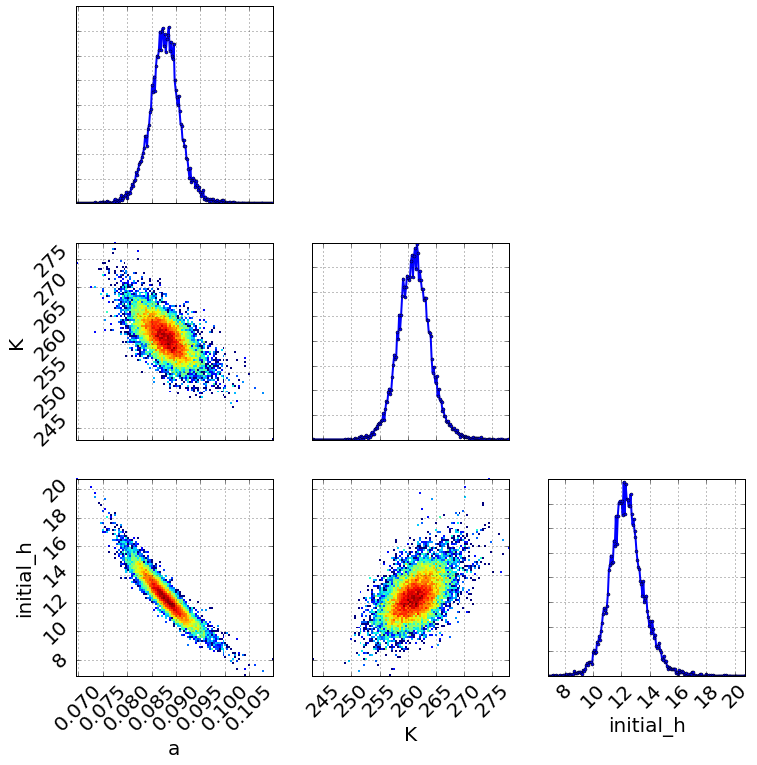

In [68]:
labels=args

def corner(samples,labels):
    N=len(labels)
    from matplotlib.colors import LogNorm
    
    figure(figsize=(12,12))
    
    axes={}
    for i,l1 in enumerate(labels):
        for j,l2 in enumerate(labels):
            if j>i:
                continue
                
            ax = subplot2grid((N,N),(i, j))
            axes[(i,j)]=ax
            
            idx_y=labels.index(l1)
            idx_x=labels.index(l2)
            x,y=samples[:,idx_x],samples[:,idx_y]
            
            if i==j:
                # plot distributions
                xx,yy=histogram(x,bins=200,plot=False)
                plot(xx,yy,'-o',markersize=3)
                gca().set_yticklabels([])
                
                if i==(N-1):
                    xlabel(l2)
                    [l.set_rotation(45) for l in ax.get_xticklabels()]
                else:
                    gca().set_xticklabels([])
                
            else:
                counts,ybins,xbins,image = hist2d(x,y,bins=100,norm=LogNorm())
                
                if i==(N-1):
                    xlabel(l2)
                    [l.set_rotation(45) for l in ax.get_xticklabels()]
                else:
                    gca().set_xticklabels([])
                    
                if j==0:
                    ylabel(l1)
                    [l.set_rotation(45) for l in ax.get_yticklabels()]
                else:
                    gca().set_yticklabels([])
    
    # make all the x- and y-lims the same
    j=0
    lims=[0]*N
    for i in range(1,N):
        ax=axes[(i,0)]
        lims[i]=ax.get_ylim()

        if i==N-1:
            lims[0]=ax.get_xlim()
    
        
    for i,l1 in enumerate(labels):
        for j,l2 in enumerate(labels):
            if j>i:
                continue
                
            ax=axes[(i,j)]
            
            if j==i:
                ax.set_xlim(lims[i])
            else:
                ax.set_ylim(lims[i])
                ax.set_xlim(lims[j])
    
corner(samples,labels)
    
# result=hist2d(,cmap=cm.jet,bins=50)


In [29]:
ax.set_aspect?

In [34]:
axis?

In [63]:
contour?